In [7]:
# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

import pandas as pd
import os

figsize = (15, 3.5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pandas and Dataset Inspection

## An Example Problem

**Let's assume we want to [estimate real-estate prices in Taiwan](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)**

<center><img src="assets/taiwan-tea-house.jpg" width=75%></center>


## Loading the Data

**We have data about this problem in a csv file in the `data` directory**

In [10]:
data = pd.read_csv(os.path.join('..', 'data', 'real_estate.csv'), sep=',')
data.head()

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


The first 4 columns contain easy-to-obtain quantities, the last does not

**Obtaining price information requires actual houses to be sold and bought**

* Therefore, it might be useful to _learn a machine model_
* ...That can _estimate the price_ based on the easily available information

## Using Histograms

**Since our goal is roughly defined, it's _a good idea to inspect the dataset_**

We will start by using _histograms_, i.e. plots with:

- On the x-axis: values for one attribute
- On the y-axis: occurrency count in the dataset

They are useful to display the _distribution_ of each column

**Some comments:**

* Continuous attributes are typically discretized (i.e. binned) first
* The counts can be normalized to obtain frequencies

**Histograms can be built directly from `pandas`**

...By using the [hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) method.

* `matplotlib` is used behind the scens and can be employed to add details
* ...Or as an alernative, if we need a more complex plot

## Dataset Inspection via Histograms

**Let's inspect the "house age" attribute**

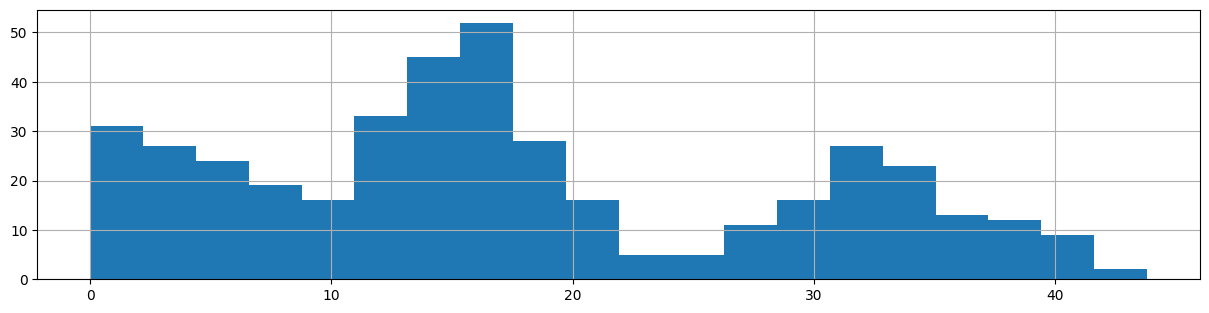

In [11]:
data['house age'].hist(figsize=figsize, bins=20);

**What can you say about that?**

## Using Histograms

**Let's inspect the "house age" attribute**

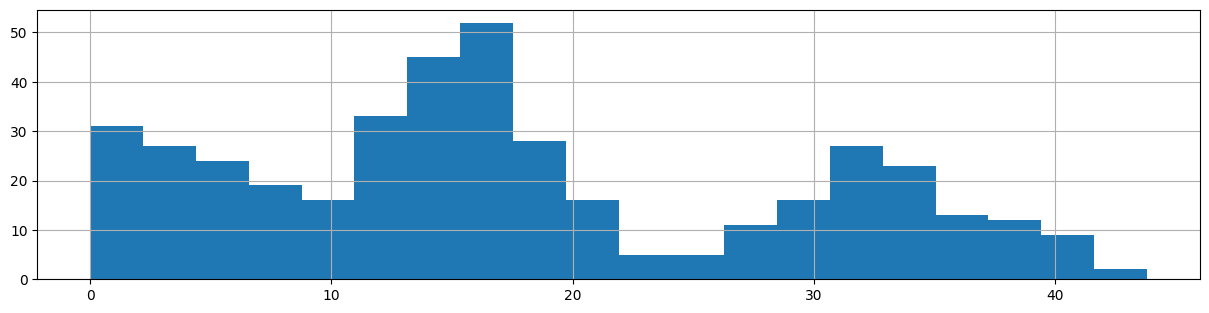

In [12]:
data['house age'].hist(figsize=figsize, bins=20);

* There seems to be two main clusters, roughly normally distributed
* Lower age values are roughly uniformly likely

**Now, try building histograms for the other columns**

## Dataset Inspection via Cartesian Plots

**We can obtain information about the distribution of each column**

...By using statistics. For example we can call:

In [13]:
data.describe()

,house age,dist to MRT,#stores,latitude,longitude,price per area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


* Statistics are a very compact way to convey information
* ...But they are also less rich than using a histogram

## Dataset Inspection via Scatter Plots

**The fourth tool we'll use for dataset inspection**

...Is given by scatter plots, which have:

- On the x-axis: the values for one attribute
- On the y-axis: the values for anotehr attribute (usually the target)
- Points in scatter plot are _not_ connected by a line

**Some comments:**

* These are great for the visual identification of correlations
* By looking at the shape of the "cloud of points"
* ...It is possible to get insight on _how_ the attributes are connected

## Using Scatter Plots

**Let's inspect how "house age" and the target are linked**

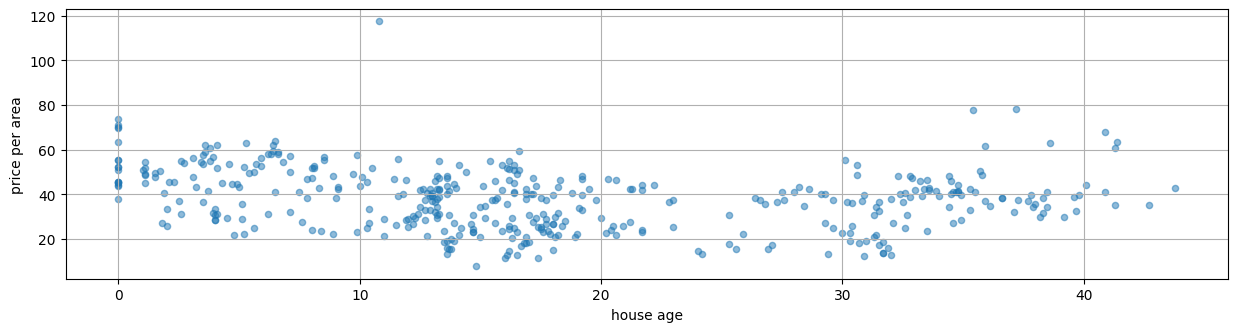

In [18]:
data.plot.scatter(x='house age', y='price per area', figsize=figsize, grid=':', alpha=0.5);

* There does not seem to be a strong correlation here
* ...But it's worth checking other columns, too

## Addendum: Using Boxplots

**For categorical attributes, a [box plot](https://en.wikipedia.org/wiki/Box_plot) may be more appropriate** 

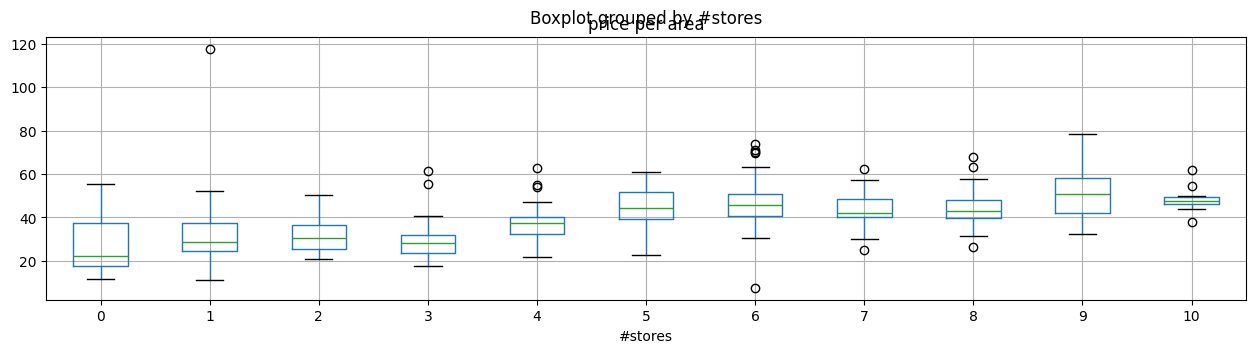

In [19]:
data.boxplot(by='#stores', column='price per area', figsize=figsize);

* We have one box per value of an attribute
* On the $y$ axis, we have a second attribute (usually the target)

## Addendum: Using Boxplots

**For categorical attributes, a [box plot](https://en.wikipedia.org/wiki/Box_plot) may be more appropriate** 

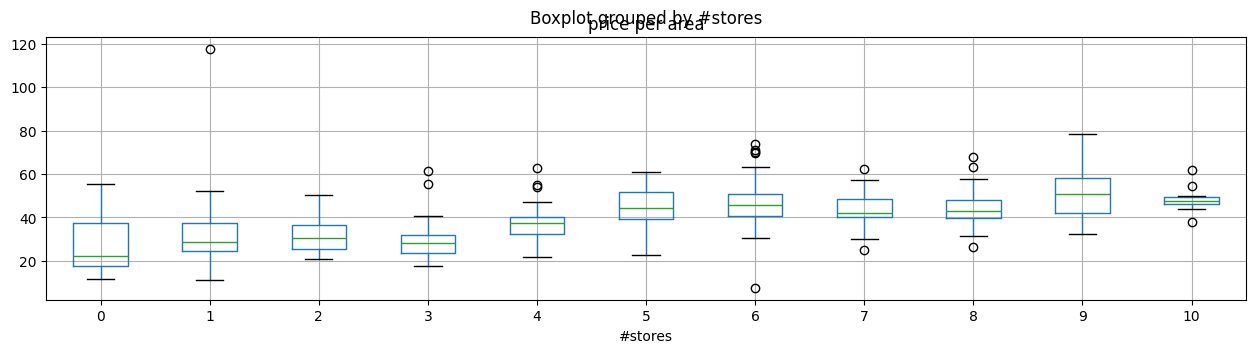

In [20]:
data.boxplot(by='#stores', column='price per area', figsize=figsize);

* The box boundaries are the 1st and 3rd quartile
* The green line represents the mean

## Addendum: Using Boxplots

**For categorical attributes, a [box plot](https://en.wikipedia.org/wiki/Box_plot) may be more appropriate** 

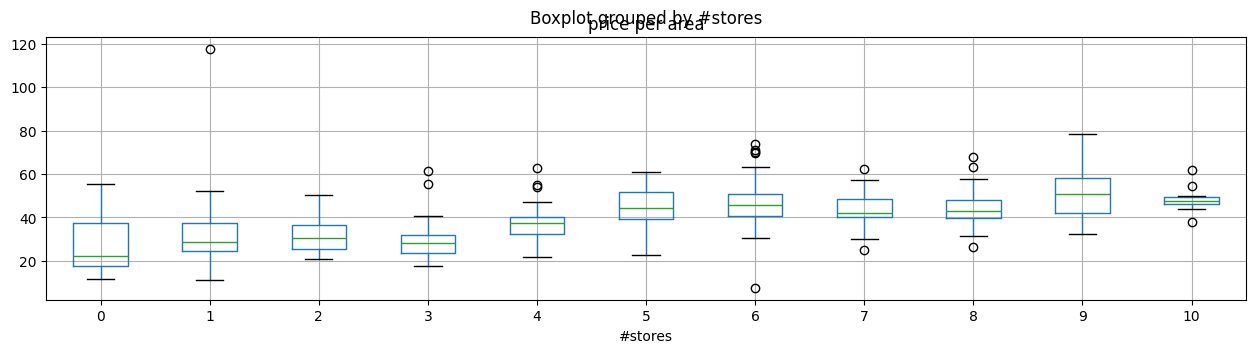

In [21]:
data.boxplot(by='#stores', column='price per area', figsize=figsize);

* The "whiskers" extend for 1.5 the inter-quartile range
* Values outside the whiskers are plotted directly

## Addendum: Using Boxplots

**For categorical attributes, a [box plot](https://en.wikipedia.org/wiki/Box_plot) may be more appropriate** 

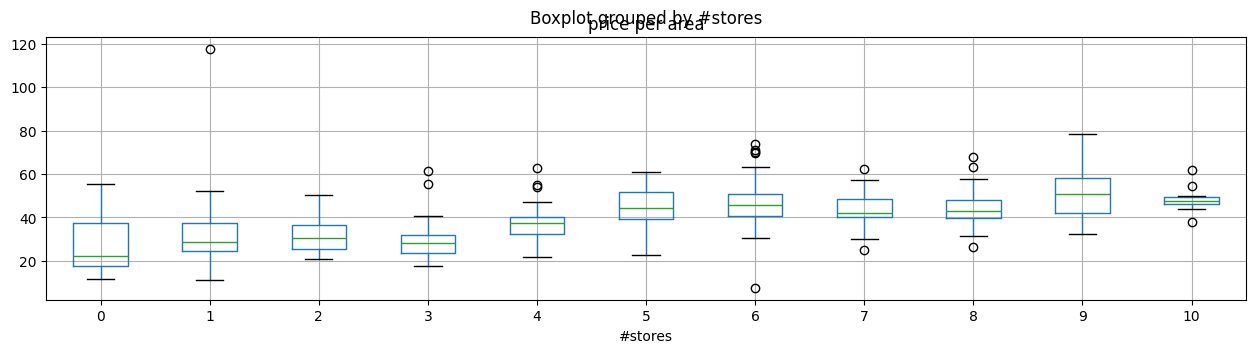

In [22]:
data.boxplot(by='#stores', column='price per area', figsize=figsize);

* Box plots are great to see how the _distribution_ of a $y$ depends on $x$
* They can be used with continuous attributes, if we first discretize them